<a id='top'></a>
<img align="center" src="https://media.moddb.com/images/members/3/2902/2901360/ao_Half-Life.png" width="100" />

<p style="text-align: center;">
    <font size='5' type='bold'>
        <b>Определение закономерностей успешности игр для компании из игровой индустрии</b>
    </font>
</p>

### Содержание

<a href='#section_0'>Задачи проекта</a>

<a href='#section_i'>I. Общая информация о данных</a>

<a href='#section_ii'>II. Предобработка данных</a>
    
<a href='#section_iii'>III. Исследовательский анализ данных</a>
* <a href='#section_iii_1'>Выпуск игр по годам</a>
* <a href='#section_iii_2'>Динамика продаж по платформам</a>
* <a href='#section_iii_3'>Динамика продаж актуального периода. Прогноз на 2017 год</a>
* <a href='#section_iii_4'>Диаграммы размаха по глобальным продажам игр в разбивке по платформам Топ-3</a>
* <a href='#section_iii_5'>Влияние отзывов критиков и пользователей на продажи внутри платформы XOne</a>
* <a href='#section_iii_6'>Корреляция между отзывами и продажами</a>
* <a href='#section_iii_7'>Распределение продаж по жанрам видеоигр</a>

<a href='#section_iv'>IV. Портрет пользователя по регионам</a>
* <a href='#section_iv_1'>Топ-5 популярных платформ по регионам</a>
* <a href='#section_iv_2'>Топ-5 популярных жанров по регионам</a>
* <a href='#section_iv_3'>Влияние рейтинга ESRB на продажи в отдельном регионе</a>

<a href='#section_v'>V. Проверка гипотез</a>
* <a href='#section_v_1'>Гипотеза о равенстве средних двух генеральных совокупностей №1 (зависимость выбора платформы от пользовательского рейтинга)</a>
* <a href='#section_v_2'>Гипотеза о равенстве средних двух генеральных совокупностей №2 (зависимость выбора жанра от пользовательского рейтинга)</a>
    
<a href='#section_vi'>VI. Общий вывод</a>
    
<a href='#section_end'>Чек-лист готовности проекта</a>

<a id='section_0'></a>
### Задачи проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Вам нужно *выявить определяющие успешность игры закономерности*. Это позволит сделать ставку на потенциально популярный продукт и *спланировать рекламные кампании*.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<a href='#top'>Back to top</a>

<a id='section_i'></a>
### I. Общая информации о данных

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd # <импорт библиотеки pandas>
import numpy as np # <импорт библиотеки NumPy>
import seaborn as sns # <импорт библиотеки Seaborn>
import matplotlib.pyplot as plt # <импорт коллекции Pyplot библиотеки Matplotlib>
import pylab as pl # <импорт модуля PyLab>
from datetime import datetime as dt # <импорт модуля datetime>
from scipy import stats as st # <импорт модуля stats>

Изучим данные, предоставленные Заказчиком для проекта. Прочитаем файл и сохраним его в переменной.

In [2]:
games_data = 'C:/Users/aleks/OneDrive/MyBackup/edu_ds_13 (Yandex)/03_Portfolio/05_Games_project/games.csv'

df = pd.read_csv(games_data)

Посмотрим на данные таблицы, и выведем общую информацию о составе данных, применив метод `info`. Также посмотрим на сводную статистику по данным, представленным в числовом виде, применив метод `describe`.

In [3]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Таблица *df* (информация об играх) содержит следующие данные:
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Всего в таблице 11 столбцов, типы данных: 
- **строки** у 5 столбцов
- **вещественные числа** (с "плавающей" точкой) у 6

Пропуски представлены в колонках *Name*, *Year_of_Release*, *Genre*, *Critic_Score*, *User_Score* и *Rating*. Данные представлены достаточно полно и ровно, без явных "выбросов". В основном представлены игры 2007 года со средним рейтингом 71 (по медианным значениям). К последующей предобработке данных мы вернемся в следующем разделе.

<a href='#top'>Back to top</a>

<a id='section_ii'></a>
### II. Предобработка данных

Предварительный разбор данных на [этапе знакомства с данными](#section_i) показал следующие очевидные недостатки в данных:
- Названия столбцов представлены в разном регистре
- Данные по рейтингу критиков и пользователей различаются на порядок
- Данные столбца *Year_of_Release* представлены в виде вещественных чисел, а данные с рейтингом пользователей *User_Score* представлены в виде строк

Исправим вышеуказанные недочеты.

In [6]:
# применим метод lower (для приведения названий столбцов к нижнему регистру)
df.columns = map(str.lower, df.columns)

Для изменения типа данных user_score необходимо разобраться со значением tbd. Аббревиатура tbd скорее всего означает to be defined, а значит рейтинг еще не представлен. Сохраним эти значения для анализа, но не в качестве 0, т.к. это повлияет на расчеты среднего и статистики, а заменим эти значения на nan.

In [7]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [8]:
# приведем данные по рейтингу пользователей к шкале от 0 до 100
df['user_score'] = df['user_score'] * 10

# пропуски в колонке year_of_release составляют не более 2% от общего набора данных, можем их исключить
# также исключим 2 пропуска в колонках с названием игры и ее жанром
df.dropna(subset = ['year_of_release'], inplace=True)
df.dropna(subset = ['name'], inplace=True)
df.dropna(subset = ['genre'], inplace=True)

# применим метод astype (для корректировки типа данных столбцов)
df['year_of_release'] = df['year_of_release'].astype('int')

In [9]:
# посмотрим на присутствие дубликатов
df.duplicated().sum()

0

In [10]:
# посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52


<a href='#top'>Back to top</a>

<a id='section_iii'></a>
### III. Исследовательский анализ данных

<a id='section_iii_1'></a>
    <b>Выпуск игр по годам</b>

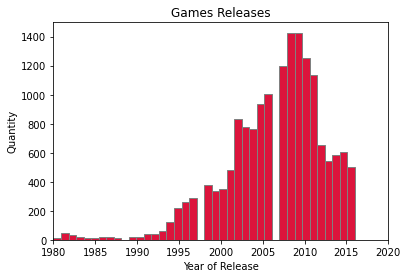

In [11]:
# построим гистограмму и посмотрим на распределение игр по году выпуска
df['year_of_release'].hist(bins=40, grid=False, color='crimson', ec='grey').set_title('Games Releases')
plt.xlim([1980,2020])
plt.xlabel("Year of Release")
plt.ylabel("Quantity")
plt.show()

Рост числа видеоигр коррелирует с ростом компьютеризации мира и наращиванием компьютерных мощностей. Спад в 2010-х годах предположительно вызван началом эры мобильных устройств и снижением доли настольных компьютеров и консолей в игровой индустрии.

<a id='section_iii_2'></a>
    <b>Динамика продаж по платформам</b>

In [12]:
# посмотрим на Топ-5 платформ по продажам
platforms = df.groupby('platform')['sales_total'].sum().sort_values(ascending=False)
platforms.head(5)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: sales_total, dtype: float64

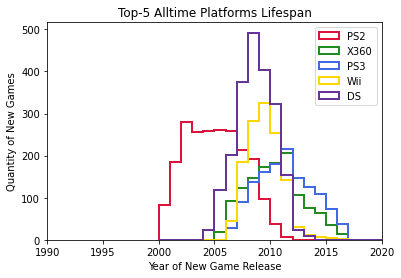

In [13]:
# построим гистограммы и посмотрим на распределение популярности платформ по годам
plt.hist(df[df['platform'] == 'PS2']['year_of_release'], bins=20, range=(2000, 2020), ec='crimson', linewidth=2, label='PS2', histtype='step', fill=False)
plt.hist(df[df['platform'] == 'X360']['year_of_release'], bins=20, range=(2000, 2020), ec='forestgreen', linewidth=2, label='X360', histtype='step', fill=False)
plt.hist(df[df['platform'] == 'PS3']['year_of_release'], bins=20, range=(2000, 2020), ec='royalblue', linewidth=2, label='PS3', histtype='step', fill=False)
plt.hist(df[df['platform'] == 'Wii']['year_of_release'], bins=20, range=(2000, 2020), ec='gold', linewidth=2, label='Wii', histtype='step', fill=False)
plt.hist(df[df['platform'] == 'DS']['year_of_release'], bins=20, range=(2000, 2020), ec='rebeccapurple', linewidth=2, label='DS', histtype='step', fill=False)

plt.legend(loc='upper right')
plt.xlim([1990,2020])

plt.xlabel("Year of New Game Release")
plt.ylabel("Quantity of New Games")
plt.title('Top-5 Alltime Platforms Lifespan')

plt.show()

Как видно из полученного распределения Топ-5 платформ с наибольшими суммарными продажами, основным поставщиком видеоигр в начале 2000-х была консоль Sony PS2. К концу 2000-х на рынок с ошеломляющим успехом ворвались консоли Nintendo - DS и Wii. Ну а уже на рубеже 2000-х и 2010-х подоспел ~как обычно~ Microsoft с X360, поделив рынок с 3-м поколением консолей Sony PlayStation.

Новые платформы появляются и исчезают за характерный срок немногим более 10 лет. Однако те незабываемые впечатления от игр остаются в сердцах людей навсегда.

<a id='section_iii_3'></a>
    <b>Динамика продаж актуального периода. Прогноз на 2017 год
</b>

Возьмём данные за актуальный период. В результате исследования предыдущих вопросов актуальным периодом для нас является период последних 10-11 лет - с 2005 по 2016 годы. Период выхода основных популярных консолей и все данные по их жизни от развития до пика и ухода с рынка. Ответим на вопрос: какие платформы лидируют по продажам, растут или падают? И выберем несколько потенциально прибыльных платформ для прогноза на 2017 год.

Посмотрим на динамику продаж актуального периода.

In [14]:
# создадим словарь для платформ, присвоим каждой платформе номер id
df_platform_dic = df['platform'].drop_duplicates().reset_index(False)
df_platform_dic['platform_id'] = df_platform_dic['platform'].index + 1

# создадим словарь для рейтинга, присвоим каждому рейтингу номер id
df['rating'].replace('', np.nan, inplace = True)
df['rating'].dropna(inplace=True)
df_rating_dic = df['rating'].drop_duplicates().reset_index(False)
df_rating_dic['rating_id'] = df_rating_dic['rating'].index + 1

# добавим колонки platform_id и rating_id в основной датасет
df['platform_id'] = df['platform'].map(df_platform_dic.set_index('platform')['platform_id'])
df['rating_id'] = df['rating'].map(df_rating_dic.set_index('rating')['rating_id'])
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total,platform_id,rating_id
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,1,1
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,2,2
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52,1,1


In [15]:
# создадим функцию для расчета ежегодных продаж по платформам
def sales_annual_per_platform(name, data):
    return (df.query('platform == @name')
            .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

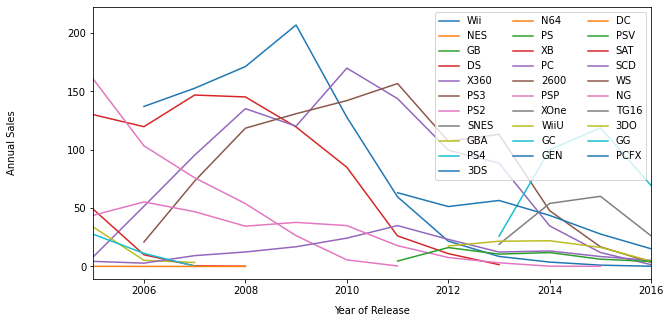

In [16]:
# построим сводный график
for platform in df_platform_dic['platform']:
    sales_annual_per_platform(platform, df)['sales_total'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Year of Release", labelpad=10)
    plt.ylabel("Annual Sales", labelpad=50)
    
    plt.xlim(2005,2016)
    
    plt.legend(ncol=3)

Согласно графикам продаж на конец 2016 года в лидерах - **PS4** от Sony, **XOne** от Microsoft и **3DS** от Nintendo.

Однако, как можно заметить, весь рынок видеоигр идет по нисходящей. Выбор потенциально прибыльных платформ достотчно прост. В лидерах на 2017 год будут вышеобозначенные флагманы "большой тройки".

<a id='section_iii_4'></a>
    <b>Диаграммы размаха по глобальным продажам игр в разбивке по платформам Топ-3</b>

Text(0.5, 0.98, 'Global Sales per Platform')

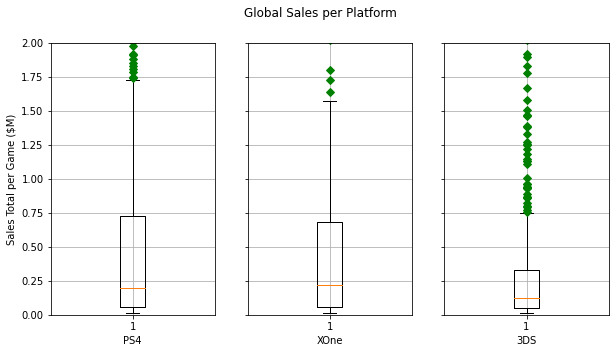

In [17]:
# построим диаграммы
fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

ax[0].boxplot(df.query('platform == "PS4"')['sales_total'], 0, 'gD')
ax[1].boxplot(df.query('platform == "XOne"')['sales_total'], 0, 'gD')
ax[2].boxplot(df.query('platform == "3DS"')['sales_total'], 0, 'gD')

ax[0].set_xlabel('PS4')
ax[1].set_xlabel('XOne')
ax[2].set_xlabel('3DS')
ax[0].set_ylabel("Sales Total per Game ($M)")

ax[0].set_ylim(0,2)

ax[0].grid()
ax[1].grid()
ax[2].grid()

fig.suptitle("Global Sales per Platform")

Как можно заметить средняя игра, выпущенная для консоли, приносит производителю от 100 до 200 тысяч долларов. Лучшие показатели по средней доходности от продаж видеоигр у Microsoft с **XOne**, за которой следует Sony с **PS4**, хотя у нее и больше продаж более дорогих игр. Замыкает тройку Nintendo с **3DS**.

<a id='section_iii_5'></a>
    <b>Влияние отзывов критиков и пользователей на продажи внутри платформы XOne</b>

Text(0.5, 0.98, 'Critic and User Score Influence on Sales')

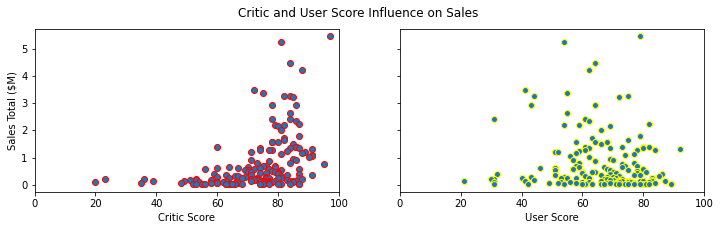

In [18]:
df_XOne = df[(df['platform'] == 'XOne') & (df['critic_score'] > 0) & (df['user_score'] > 0)]

x1 = df_XOne['critic_score']
x2 = df_XOne['user_score']
y = df_XOne['sales_total']

fig, axs = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
axs[0].scatter(x1, y, edgecolors='red', linewidth=1)
axs[1].scatter(x2, y, edgecolors='yellow', linewidth=1)

axs[0].set_xlabel("Critic Score")
axs[1].set_xlabel("User Score")
axs[0].set_ylabel("Sales Total ($M)")

axs[0].set_xlim(0,100)
axs[1].set_xlim(0,100)

fig.suptitle("Critic and User Score Influence on Sales")

Оценки как критиков, так и пользователей, бесспорно, влияют на продажи. Люди слишком заняты, чтобы разбираться во всем мноогообразии игр и выбирать самостоятельно.

<a id='section_iii_6'></a>
    <b>Корреляция между отзывами и продажами</b>

<AxesSubplot:>

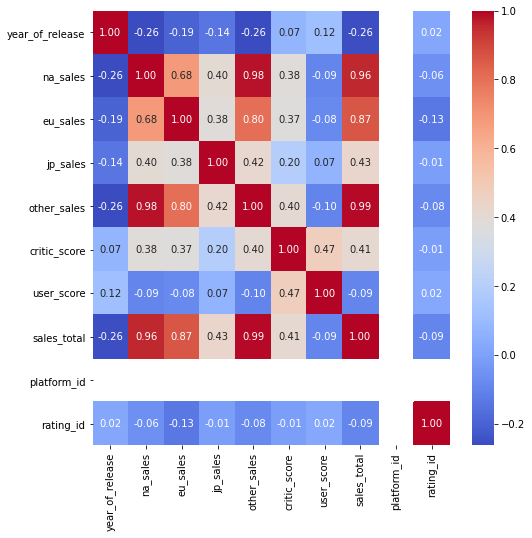

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df_XOne.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws={'size':10})

На примере платформы **XOne** очень низкая корреляция, показывающая отсутствие более или менее прослеживаемой зависимости продаж от отзывов пользователей. Мнение критиков более весомо и немного, но все-таки коррелируется с продажами.

Посмотрим на корреляцию продаж на других платформах Топ-3.

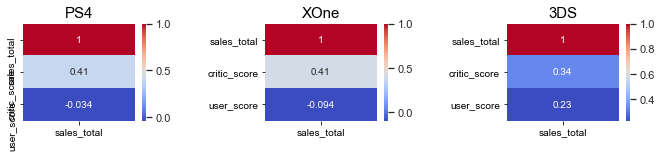

In [20]:
# применим цикл для вывода графиков для Топ-3 платформ

top_3 = ['PS4', 'XOne', '3DS']

fig, axes = plt.subplots(1, 3, figsize=(10,3))

count = 0
for c in range(3):
    top_platform = top_3[count]
    df_top = df[(df['platform'] == top_platform) & (df['critic_score'] > 0) & (df['user_score'] > 0)]
    df_top_query = df_top[['sales_total' ,'critic_score', 'user_score']]
    sns.set(font_scale=1.0)
    ax = sns.heatmap(df_top_query.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                                cmap="coolwarm", annot=True, annot_kws={'size':10}, ax=axes[c])
    ax.set_title(top_platform, fontsize=15)
    plt.tight_layout(pad=3)
    count += 1

Для платформы **PS4** все так же, как и у **XOne** - мнение критиков весомо, а мнение пользователей практически не коррелируется. А вот у платформы Nintendo показатели критиков и пользователей сопоставимы, игроки платформы **3DS** при покупке видеоигр прислушиваются к критике как экспертов, так и пользователей.

<a id='section_iii_7'></a>
    <b>Распределение продаж по жанрам видеоигр</b>

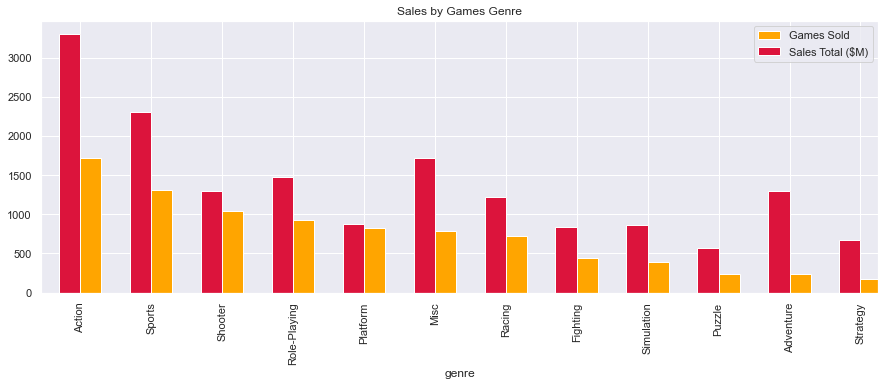

In [21]:
# построим график и посмотрим на распределение доходов от видеоигр по жанрам
ax = plt.gca()

genre_pivot = df.pivot_table(index='genre', values='sales_total', aggfunc={'genre': 'count', 'sales_total': 'sum'})\
                .sort_values(by='sales_total', ascending=False)
        
genre_pivot['sales_total'].plot(kind='bar', figsize=(15,5), ax=ax, position=0, color='orange', width=0.3)
genre_pivot['genre'].plot(kind='bar', figsize=(15,5), ax=ax, position=1, color='crimson', width=0.3)

plt.title('Sales by Games Genre')
plt.legend(loc='upper right')

ax.legend(['Games Sold', 'Sales Total ($M)'])

plt.show()

Бесспорной популярностью среди геймеров всего мира пользуются "ассасин", "фифа" и "контра" как по общей выручке, так и по количеству проданных игр. Тем не менее шутеры дешевле RPG и "бродилок" с предустановленными характерами жанра *Adventure*. В целом разница в жанрах *RPG*, *Action* и *Adventure* зачастую размывается и вполне обоснованно жанр *Misc* на третьем месте по продажам. Люди готовы платить больше за объединение жанров.

### Вывод
Топ-5 платформ с наибольшими суммарными продажами, основным поставщиком видеоигр в начале 2000-х была консоль Sony PS2. К концу 2000-х на рынок с ошеломляющим успехом ворвались консоли Nintendo - DS и Wii. Ну а уже на рубеже 2000-х и 2010-х подоспел как обычно Microsoft с X360, поделив рынок с 3-м поколением консолей Sony PlayStation.

Новые платформы появляются и исчезают за характерный срок немногим более **10 лет**.

На конец 2016 года в лидерах - PS4 от Sony, XOne от Microsoft и 3DS от Nintendo. Рынок консолей продолжит падение. В 2017 году лидеры рынка *не поменяются*.

Средняя игра, выпущенная для консоли, приносит производителю *от 100 до 200 тысяч долларов*. Лучшие показатели по средней доходности от продаж видеоигр у Microsoft с **XOne**, за которой следует Sony с **PS4**, хотя у нее и больше продаж более дорогих игр. Замыкает тройку Nintendo с **3DS**.

Критика влияет на продажи. Для платформы PS4 все так же, как и у XOne - мнение критиков весомо, а мнение пользователей практически не коррелируется. А вот у платформы 3DS от Nintendo показатели критиков и пользователей сопоставимы, игроки платформы 3DS при покупке видеоигр прислушиваются к критике как экспертов, так и пользователей.

Бесспорной популярностью среди геймеров всего мира пользуются игры жанров **Action**, **Sports** и **Shooter** как по общей выручке, так и по количеству проданных игр. Доходы от продаж игр жанра Shooter отстают от доходов от продаж игр жанров **Role-Playing** и **Adventure**, и немного обходят жанр **Racing**.

Перейдем к статистическому анализу.

<a href='#top'>Back to top</a>

<a id='section_iv'></a>
### IV. Портрет пользователя по регионам
Посмотрим на общую картину распределения пользователей по регионам.

Определим для пользователя каждого региона (Северная Америка, Европа, Япония):
* Самые популярные платформы (Топ-5)
* Самые популярные жанры (Топ-5)
* Влияние рейтинга ESRB на продажи в отдельном регионе


<a id='section_iv_1'></a>
    <b>Топ-5 популярных платформ по регионам</b>

<AxesSubplot:xlabel='platform'>

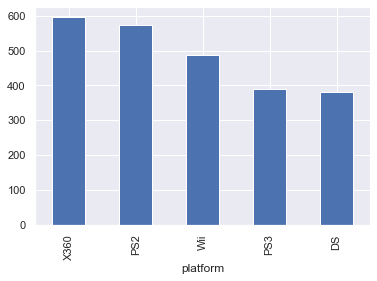

In [22]:
# построим графики и посмотрим на распределение платформ по регионам

df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='platform'>

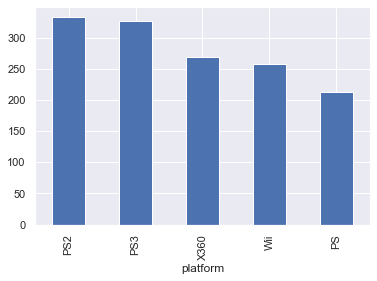

In [23]:
df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='platform'>

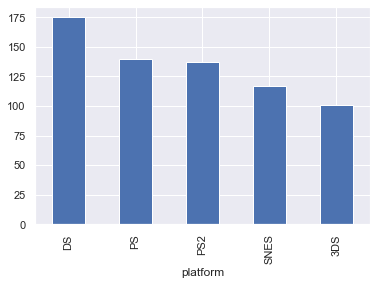

In [24]:
df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

В Японии поддерживают отечетсвенного производителя Nintendo. В отличие от Европы и Северной Америки, где доминируют консоли Sony и Microsoft.

<a id='section_iv_2'></a>
    <b>Топ-5 популярных жанров по регионам</b>

<AxesSubplot:xlabel='genre'>

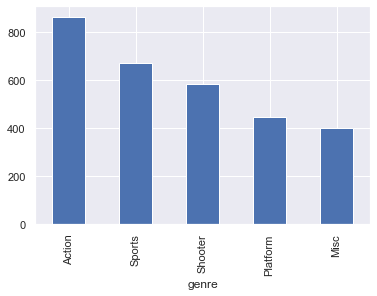

In [25]:
# построим графики и посмотрим на распределение жанров по регионам

df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='genre'>

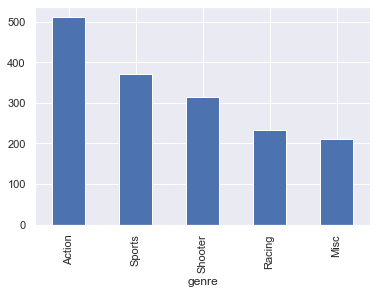

In [26]:
df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='genre'>

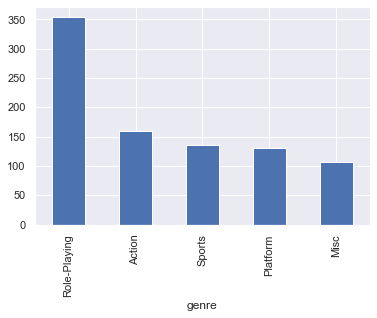

In [27]:
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

Тренд по жанрам в зависимости от региона выглядит сопоставимым. Топ-5 популярных жанров (в порядке убывания) - *Role-playing, Action, Sports, Platform и Misc*. При этом стоит отметить, что в Японии жанр *RPG* пользуется бешеной популярностью, более, чем в два раза, превосходя остальные жанры.

<a id='section_iv_3'></a>
    <b>Влияние рейтинга ESRB на продажи в отдельном регионе</b>

In [28]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [29]:
# создадим словарь для расшифровки рейтинга
rating_dic = pd.DataFrame({'rating': ['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
                           'rating_type': ['Для всех', 'Для всех старше 17 лет', 'Для всех старше 13 лет', 'Для всех старше 10 лет', 'Для всех(до 1998 года)', 'Только для взрослых', 'Для детей младшего возраста', 'Рейтинг ожидается']})

rating_dic

,rating,rating_type
0,E,Для всех
1,M,Для всех старше 17 лет
2,T,Для всех старше 13 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [30]:
# добавим колонку с расшифровкой рейтинга в общий датасет
df['rating_type'] = df['rating'].map(rating_dic.set_index('rating')['rating_type'])
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total,platform_id,rating_id,rating_type
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,1,1,Для всех
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,2,2,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52,1,1,Для всех


<AxesSubplot:xlabel='rating_type'>

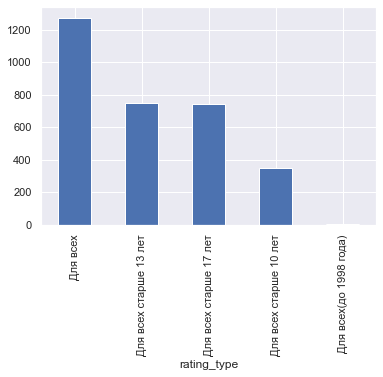

In [31]:
# построим график и посмотрим на распределение рейтинга ESRB по регионам
df.groupby('rating_type')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='rating_type'>

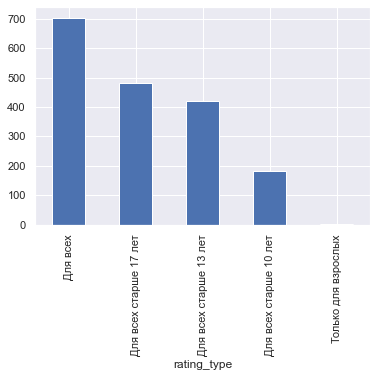

In [32]:
df.groupby('rating_type')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='rating_type'>

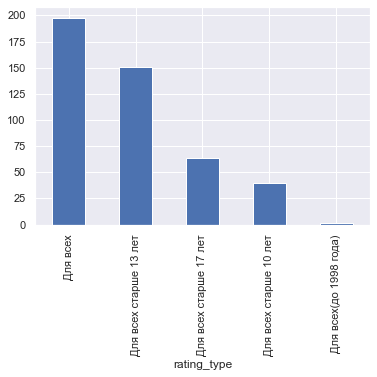

In [33]:
df.groupby('rating_type')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

Выручка от продаж видеоигр распределена по рейтингу вполне ожидаемо. На первом месте во всех регионах игры "Для всех". Второе и третье места по продажам в Европе и Северной Америке делят игры с возрастным ограничением от 13 и от 17 лет. И только в Японии игры с рейтингом от 13 лет гораздо более популярны, чем игры от 17 лет. Возможно из-за культурного своеобразия "страны восходящего солнца".

<a href='#top'>Back to top</a>

<a id='section_v'></a>
### V. Проверка гипотез
Проверим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

<a id='section_v_1'></a>
    <b>Гипотеза о равенстве средних двух генеральных совокупностей №1<b/>

Сформулируем гипотезы:
- H0: средний пользовательский рейтинг платформ Xbox One и PS одинаковый
- H1: средний пользовательский рейтинг платформ Xbox One и PS различается

In [34]:
# разделим датасет по платформам - XboxOne и PS
xone = df[df['platform'] == 'XOne']
ps = df[df['platform'] == 'PS']

# избавимся от выбросов с помощью функции del_outliers
def del_outliers(df, col, add_boxplot = 0, x = 10, y = 10):
    btm_quartile = df[col].quantile(0.25)                 
    top_quartile = df[col].quantile(0.75)
    interquartile = top_quartile - btm_quartile
    true_data_range = (df[col] >= (btm_quartile - 1.5*interquartile)) & (df[col] <= (top_quartile + 1.5*interquartile))
    if add_boxplot == 1:
        return df.loc[true_data_range].boxplot([col], figsize=(x,y))
    else:
        return df.loc[true_data_range]
    
xone = del_outliers(xone, 'user_score', 0)
xone = xone['user_score']
ps = del_outliers(ps, 'user_score', 0)
ps = ps['user_score']

In [35]:
# проверим гипотезу
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results_platform = st.ttest_ind(xone, ps, equal_var = False)

print('p-значение:', results_platform.pvalue)

if (results_platform.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.5106759570708723e-25
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что популярность каждой платформы формируется по разному. Платформы пользуются разной степенью популярности.

<a id='section_v_2'></a>
    <b>Гипотеза о равенстве средних двух генеральных совокупностей №2</b>

Сформулируем гипотезы:
* H0: Средний пользовательский рейтинг жанров Action и Sports одинаковый
* H1: Средний пользовательский рейтинг жанров Action и Sports разный

In [36]:
# разделим датасет по жанрам - Action и Sports
action = df[df['genre'] == 'Action']
sports = df[df['genre'] == 'Sports']

In [37]:
# избавимся от выбросов
action = del_outliers(action, 'user_score', 0)
action = action['user_score']
sports = del_outliers(sports, 'user_score', 0)
sports = sports['user_score']

In [38]:
# проверим гипотезу
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results_genre = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results_genre.pvalue)

if (results_genre.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.07448892324430714
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что различия в предпочтениях жанров Action или Sports минимальны и сопоставимы. Оба жанра чрезвычайно популярны.

<a href='#top'>Back to top</a>

<a id='section_vi'></a>
### VI. Общий вывод
**Основные выводы:**
* жизнь платформы не долговечна - 10-11 лет
* топ-5 платформ с наибольшими суммарными продажами, основным поставщиком видеоигр в начале 2000-х была консоль Sony PS2. К концу 2000-х на рынок с ошеломляющим успехом ворвались консоли Nintendo - DS и Wii. Ну а уже на рубеже 2000-х и 2010-х подоспел как обычно Microsoft с X360, поделив рынок с 3-м поколением консолей Sony PlayStation
* на конец 2016 года в лидерах - PS4 от Sony, XOne от Microsoft и 3DS от Nintendo. Рынок консолей продолжит падение. В 2017 году лидеры рынка не поменяются
* средняя игра, выпущенная для консоли, приносит производителю от 100 до 200 тысяч долларов
* критика/рейтинги влияют на продажи
* в Японии поддерживают отечетсвенного производителя Nintendo. В отличие от Европы и Северной Америки, где доминируют консоли Sony и Microsoft
* популярностью среди геймеров всего мира пользуются игры жанров Action, Sports и Shooter как по общей выручке, так и по количеству проданных игр. Доходы от продаж игр жанра Shooter отстают от доходов от продаж игр жанров Role-Playing и Adventure, и немного обходят жанр Racing
* топ-5 популярных жанров (в порядке убывания) - Role-playing, Action, Sports, Platform и Misc
* по рейтингу ESRB на первом месте во всех регионах игры "Для всех". Второе и третье места по продажам в Европе и Северной Америке делят игры с возрастным ограничением от 13 и от 17 лет. И только в Японии игры с рейтингом от 13 лет гораздо более популярны, чем игры от 17 лет

**Основные выводы после проверки статистических гипотез:**
* платформы XBox One и PS пользуются разной степенью популярности
* различия в предпочтениях жанров Action или Sports минимальны и сопоставимы, оба жанра чрезвычайно популярны

**Рекомендации производителям:**
* делать упор на работу с блоггерами обзоров игр и топовые ревью журналы
* выработать систему формирования рейтинга
* век консоли недолговечен, после выхода очередной - уже думать о следующей, и желательно мобильной, и не забывать что PSP было потрясающей идеей Sony

<a href='#top'>Back to top</a>